# Optimizers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [3]:
class Momentum():
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h={}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [5]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

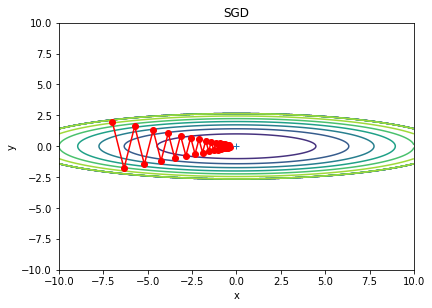

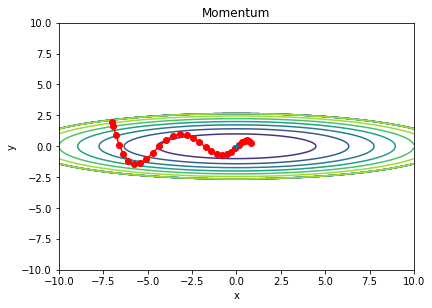

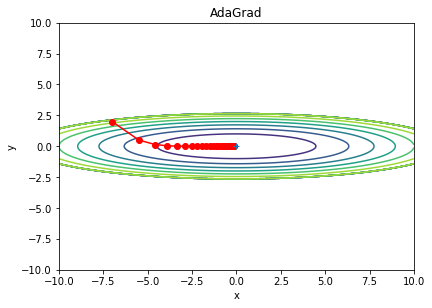

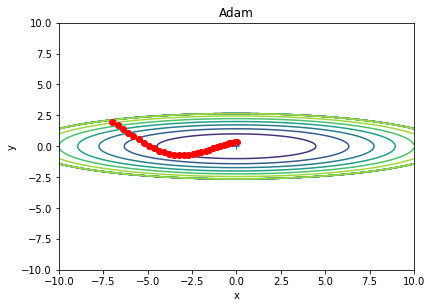

In [6]:
def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    plt.figure(figsize=(14, 10))
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

# 가중치 초기화

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#### np.random.randn은 평균0, 표준편차1의 표준 정규분포를 shape형태에 맞춰 생성함
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 1
    print(x.sum(), end="    ")
    a = np.dot(x, w)
    print(a.sum(), end="    ")
    print()
####### sigmoid func을 거치면 100000의 데이터를 0~1을 출력하게 되며 표준 정규분포를 사용했으므로 계속해서 50000에 가까운 값을 출력한다.
    z = sigmoid(a)
    activations[i] = z

-224.75080038776434    -21.38399464243912    
49943.778457617336    65308.287842900514    
54324.66054617291    3995.6094936504137    
51405.84597559088    -35480.8364832023    
48152.70591533929    55557.166660491464    


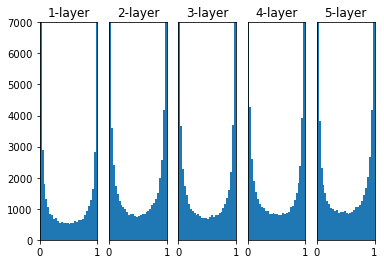

In [8]:
### dict.items()는 key와 value를 동시에 반환함
def show():
    for i, a in activations.items():
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1) + "-layer")
        if i != 0: plt.yticks([], [])
        plt.xlim(0, 1)
        plt.ylim(0, 7000)
        plt.hist(a.flatten(), 30, range=(0,1))
    plt.show()
show()

In [9]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
##### random.randn은 평균 0 에 표준편차1의 데이터 생성 이에 일정값을 곱하면 표준편차만 값의 표준편차만 변화시킨다고 보면 된다
    w = np.random.randn(node_num, node_num) * 0.01
    print(x.sum(), end="    ")
    a = np.dot(x, w)
    print(a.sum(), end="    ")
    print()
####### sigmoid func을 거치면 100000의 0.5에 가까운 값을 출력하며 전부 더하면 50000에 근사한다
    z = sigmoid(a)
    activations[i] = z

-141.5223685465797    -25.66380145375686    
49993.61678993039    -487.6326899139124    
49878.12909271953    157.7631515172631    
50039.42557634492    986.6769111380474    
50246.474019618545    -311.9899129729513    


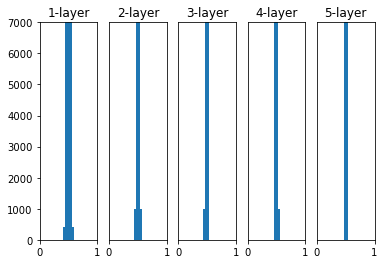

In [10]:
### dot(x, w)연산에서 w값이 매우 작아졌으므로 sig(0) -> 0.5쪽으로 치우져짐
show()

In [11]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)    ### = w / 10.0
    print(x.sum(), end="    ")
    a = np.dot(x, w)
    print(a.sum(), end="    ")
    print()
####### sigmoid func을 거치면 100000의 0.5에 가까운 값을 출력하며 전부 더하면 50000에 근사한다
    z = sigmoid(a)
    activations[i] = z

100.33463365287533    90.92820514208054    
50010.14376385427    4405.595897377606    
51067.19818135364    11152.175755195214    
52673.48540148775    12114.049916738155    
52818.45740181791    7949.021581533567    


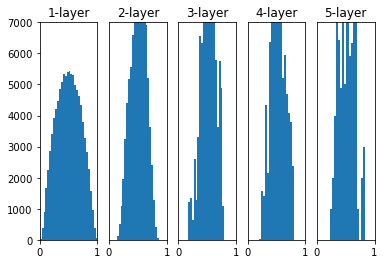

In [12]:
show()

In [13]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)    ### = w / 10.0
    print(x.sum(), end="    ")
    a = np.dot(x, w)
    print(a.sum(), end="    ")
    print()
####### sigmoid func을 거치면 100000의 0.5에 가까운 값을 출력하며 전부 더하면 50000에 근사한다
    z = np.tanh(a)
    activations[i] = z

-24.60885178609766    -86.72815825786518    
-63.76285361162626    -178.49728801959705    
-144.7364270806929    -77.3196214986822    
-45.538370264391745    -169.26245661834264    
-128.16058942813382    6.005823591852863    


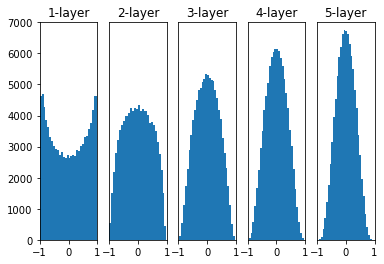

In [14]:
### dict.items()는 key와 value를 동시에 반환함
def show_wide():
    for i, a in activations.items():
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1) + "-layer")
        if i != 0: plt.yticks([], [])
        plt.xlim(-1, 1)
        plt.ylim(0, 7000)
        plt.hist(a.flatten(), 30)
    plt.show()
show_wide()

In [15]:
def Relu(x):
    return np.maximum(0, x)

In [16]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)    ### = w / 10.0
    print(x.sum(), end="    ")
    a = np.dot(x, w)
    print(a.sum(), end="    ")
    print()
####### sigmoid func을 거치면 100000의 0.5에 가까운 값을 출력하며 전부 더하면 50000에 근사한다
    z = Relu(a)
    activations[i] = z

127.99882086981495    522.6108440336643    
40366.19668643874    4459.798939256986    
30337.579406702942    -5894.245380037667    
17484.176204223455    4177.762739601747    
15686.321463707543    124.45135143988605    


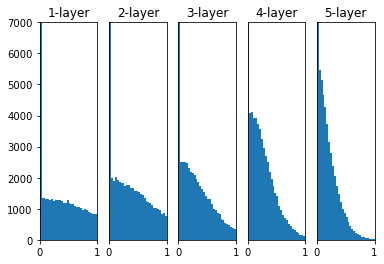

In [17]:
show()

-304.7968749492796    -305.35728061495234    
79236.1130695801    -3490.720302014869    
110307.8937696246    -18821.672073943057    
147397.39883885894    16159.221980490413    
222193.04065856704    -11724.490588083738    


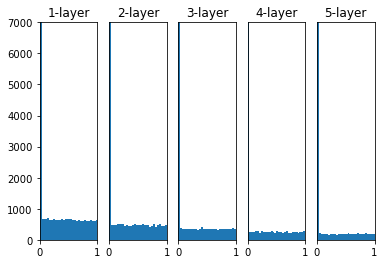

In [18]:
x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations={}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)*2.0  
    print(x.sum(), end="    ")
    a = np.dot(x, w)
    print(a.sum(), end="    ")
    print()
####### sigmoid func을 거치면 100000의 0.5에 가까운 값을 출력하며 전부 더하면 50000에 근사한다
    z = Relu(a)
    activations[i] = z
#### 층이 진행되어도 분포가 일정하다!
show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

===========iteration:0===========
std=0.01:2.30256706852174
Xavier:2.3058861069549494
He:2.3986461000465646
===========iteration:100===========
std=0.01:2.301806984623223
Xavier:2.232542251163412
He:1.7857037812814864
===========iteration:200===========
std=0.01:2.303384696782845
Xavier:2.1015993355351617
He:0.8603953224397565
===========iteration:300===========
std=0.01:2.3015472290255645
Xavier:1.7071161093432545
He:0.5145368185182919
===========iteration:400===========
std=0.01:2.3038231784574053
Xavier:1.2811896512663936
He:0.4063157970389818
===========iteration:500===========
std=0.01:2.3016844422524314
Xavier:0.9928298524879638
He:0.4342902144375296
===========iteration:600===========
std=0.01:2.301670660548612
Xavier:0.6772128878445652
He:0.3056122955771302
===========iteration:700===========
std=0.01:2.303814889769526
Xavier:0.5666700270858676
He:0.364632534189358
===========iteration:800===========
std=0.01:2.296929798093871
Xavier:0.413510818349498
He:0.2389240181257316
====

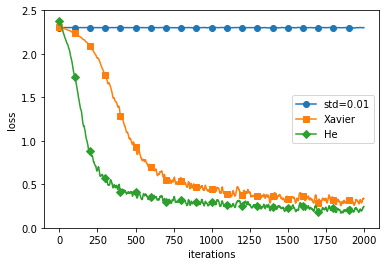

In [20]:

# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
#### MulLayerNet에서 가중치 초기화 구현되어있음
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# 배치 정규화 

In [21]:
###책 214p 확인

# 규제 기법

In [22]:
x_train = x_train[:300]
t_train = t_train[:300]

In [23]:
network = MultiLayerNet(784, hidden_size_list=[100]*6, output_size=10)
optimizer = SGD(lr=0.01)

epoch:0, train acc:0.11666666666666667, test acc:0.1059
epoch:1, train acc:0.12, test acc:0.1087
epoch:2, train acc:0.12, test acc:0.1153
epoch:3, train acc:0.13666666666666666, test acc:0.1206
epoch:4, train acc:0.14666666666666667, test acc:0.1272
epoch:5, train acc:0.13333333333333333, test acc:0.124
epoch:6, train acc:0.14666666666666667, test acc:0.1278
epoch:7, train acc:0.16, test acc:0.1347
epoch:8, train acc:0.15333333333333332, test acc:0.138
epoch:9, train acc:0.17333333333333334, test acc:0.1495
epoch:10, train acc:0.19666666666666666, test acc:0.1662
epoch:11, train acc:0.21, test acc:0.1868
epoch:12, train acc:0.25, test acc:0.2139
epoch:13, train acc:0.2633333333333333, test acc:0.219
epoch:14, train acc:0.2966666666666667, test acc:0.2409
epoch:15, train acc:0.32, test acc:0.2605
epoch:16, train acc:0.33666666666666667, test acc:0.2663
epoch:17, train acc:0.3566666666666667, test acc:0.2849
epoch:18, train acc:0.36666666666666664, test acc:0.3071
epoch:19, train acc:0.4

epoch:164, train acc:1.0, test acc:0.7263
epoch:165, train acc:1.0, test acc:0.7259
epoch:166, train acc:1.0, test acc:0.7267
epoch:167, train acc:1.0, test acc:0.7255
epoch:168, train acc:1.0, test acc:0.7272
epoch:169, train acc:1.0, test acc:0.7284
epoch:170, train acc:1.0, test acc:0.7269
epoch:171, train acc:1.0, test acc:0.727
epoch:172, train acc:1.0, test acc:0.7264
epoch:173, train acc:1.0, test acc:0.7266
epoch:174, train acc:1.0, test acc:0.7265
epoch:175, train acc:1.0, test acc:0.7287
epoch:176, train acc:1.0, test acc:0.7271
epoch:177, train acc:1.0, test acc:0.7265
epoch:178, train acc:1.0, test acc:0.7273
epoch:179, train acc:1.0, test acc:0.7252
epoch:180, train acc:1.0, test acc:0.7274
epoch:181, train acc:1.0, test acc:0.729
epoch:182, train acc:1.0, test acc:0.7283
epoch:183, train acc:1.0, test acc:0.7285
epoch:184, train acc:1.0, test acc:0.7296
epoch:185, train acc:1.0, test acc:0.7278
epoch:186, train acc:1.0, test acc:0.7281
epoch:187, train acc:1.0, test acc:0

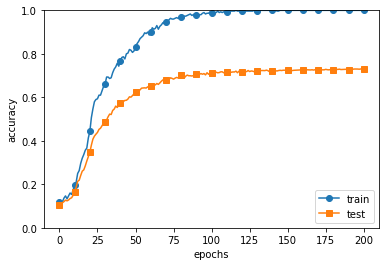

In [24]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 비용함수를 건드리는 규제쪽은 역전파를 조금만 더 본 다음 생각해보자...

# 드롭아웃 

In [25]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

In [28]:
x.shape

(201,)

In [33]:
from common.util import shuffle_dataset
from common.trainer import Trainer

In [30]:
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [31]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [37]:
optimization_trial = 10
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

####어떤식으로  manual search 구현하는지 정도만 check    
    
# print("=========== Hyper-Parameter Optimization Result ===========")
# graph_draw_num = 20
# col_num = 5
# row_num = int(np.ceil(graph_draw_num / col_num))
# i = 0

# for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
#     print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

#     plt.subplot(row_num, col_num, i+1)
#     plt.title("Best-" + str(i+1))
#     plt.ylim(0.0, 1.0)
#     if i % 5: plt.yticks([])
#     plt.xticks([])
#     x = np.arange(len(val_acc_list))
#     plt.plot(x, val_acc_list)
#     plt.plot(x, results_train[key], "--")
#     i += 1

#     if i >= graph_draw_num:
#         break

# plt.show()

val acc:0.16666666666666666 | lr:0.004426049562263039, weight decay:3.542464538773707e-08
val acc:0.16666666666666666 | lr:1.2250256634881224e-06, weight decay:2.3436913314601925e-08
val acc:0.05 | lr:0.000729911769355869, weight decay:1.9834837874374787e-08
val acc:0.016666666666666666 | lr:0.007553311186855406, weight decay:2.330154768361401e-05
val acc:0.08333333333333333 | lr:0.00011466195076295627, weight decay:1.9247156069536256e-07
val acc:0.15 | lr:0.007176841512757863, weight decay:2.081575811133746e-06
val acc:0.16666666666666666 | lr:0.00022956061275497582, weight decay:3.667410303091244e-08
val acc:0.06666666666666667 | lr:1.3529199071396888e-06, weight decay:6.24562790113453e-07
val acc:0.08333333333333333 | lr:2.415096389738427e-06, weight decay:3.4885563039047736e-07
val acc:0.13333333333333333 | lr:5.894731553237706e-05, weight decay:2.592870901049846e-07
